In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
try:
    data = pd.read_csv("data.csv", names=["xi1", "xi2", "xi3", "xi4", "xi5"])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please upload the file to the current directory.")

Dataset loaded successfully.


In [ ]:
# Check the shape of the data
print("Data shape:", data.shape)

# Display the first 5 rows
print("\nFirst 5 rows of the data:")
display(data.head())

# Display descriptive statistics
print("\nDescriptive statistics:")
display(data.describe())

Explained Variance Ratio:
[5.69609167e-01 4.25986635e-01 4.36690016e-03 1.94195189e-05
 1.78776771e-05]


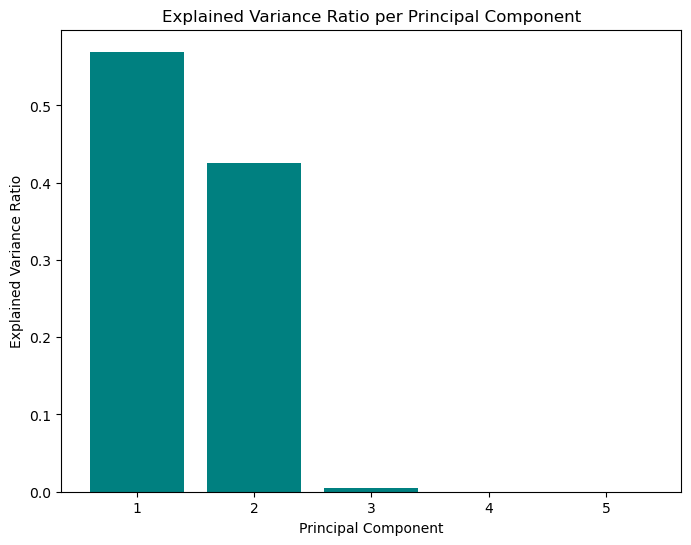

In [3]:
# Create and fit the PCA model
pca = PCA(n_components=5)
pca.fit(data)

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plotting the Explained Variance Ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), pca.explained_variance_ratio_, color='teal')
plt.title("Explained Variance Ratio per Principal Component")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 6))
plt.show()

Shape of the 2D projected data: (999, 2)


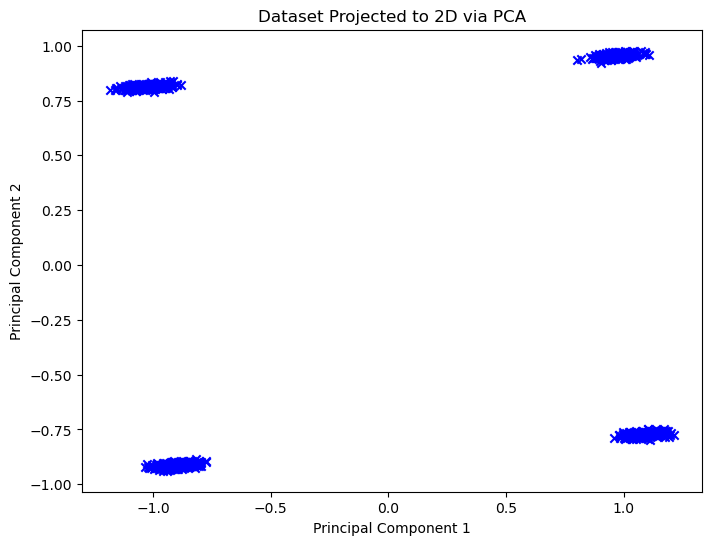

In [4]:
# Create and fit a PCA model with 2 components
pca_2d = PCA(n_components=2)
new_data = pca_2d.fit_transform(data)

print("Shape of the 2D projected data:", new_data.shape)

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(new_data[:, 0], new_data[:, 1], color="blue", marker="x")
plt.title("Dataset Projected to 2D via PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [5]:
def implement_pca_from_scratch(data_df, n_components):
    """
    Performs PCA from scratch using NumPy.
    :param data_df: pandas DataFrame with the data.
    :param n_components: Number of components to return.
    :return: Projected data, normalized eigenvalues, and sorted eigenvectors.
    """
    data_np = data_df.values

    # Center the data
    data_mean = np.mean(data_np, axis=0)
    centered_data = data_np - data_mean

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Normalize the eigenvalues
    normalized_eigenvalues = sorted_eigenvalues / np.sum(sorted_eigenvalues)

    # Select the top n_components eigenvectors to create the projection matrix
    projection_matrix = sorted_eigenvectors[:, :n_components]

    # Project the centered data
    projected_data = np.matmul(centered_data, projection_matrix)

    return projected_data, normalized_eigenvalues, sorted_eigenvectors

In [6]:
# Run the custom PCA function with 5 components
projected_data_custom, normalized_eigenvalues_custom, sorted_eigenvectors_custom = implement_pca_from_scratch(data, n_components=5)

# Compare explained variance ratios
print("Scikit-learn Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("\nCustom PCA Explained Variance Ratio:")
print(normalized_eigenvalues_custom)

# Compare eigenvectors (components)
print("\nScikit-learn Components:")
print(pca.components_.T) # Transposed for easier comparison with NumPy's column vectors
print("\nCustom PCA Eigenvectors:")
print(sorted_eigenvectors_custom)

Scikit-learn Explained Variance Ratio:
[5.69609167e-01 4.25986635e-01 4.36690016e-03 1.94195189e-05
 1.78776771e-05]

Custom PCA Explained Variance Ratio:
[5.69609167e-01 4.25986635e-01 4.36690016e-03 1.94195189e-05
 1.78776771e-05]

Scikit-learn Components:
[[-4.97997229e-01 -3.44498095e-02 -2.91255747e-01 -4.06337390e-01
   7.07723099e-01]
 [ 4.07062087e-02 -5.75909539e-01 -3.63384752e-03 -7.07699434e-01
  -4.07209423e-01]
 [-4.56858664e-01 -6.10071476e-01 -2.91186891e-01  5.58264536e-01
  -1.50478761e-01]
 [-5.38664206e-01  5.41720583e-01 -2.88662655e-01 -1.49629262e-01
  -5.57372979e-01]
 [-5.01460665e-01 -3.86395873e-02  8.64315308e-01 -1.79660978e-03
  -7.11818733e-05]]

Custom PCA Eigenvectors:
[[-4.97997229e-01  3.44498095e-02 -2.91255747e-01  4.06337390e-01
  -7.07723099e-01]
 [ 4.07062087e-02  5.75909539e-01 -3.63384752e-03  7.07699434e-01
   4.07209423e-01]
 [-4.56858664e-01  6.10071476e-01 -2.91186891e-01 -5.58264536e-01
   1.50478761e-01]
 [-5.38664206e-01 -5.41720583e-01 

### Analysis of PCA Results

The provided output successfully completes both tasks of the practical exercise on Principal Component Analysis (PCA). The results from the `scikit-learn` library and your custom `NumPy` implementation are consistent, validating your understanding of the underlying algorithm.

***

#### Task 1: Scikit-learn PCA

The initial steps successfully load and describe the dataset. The data contains **999 rows** and **5 columns (features)**. The `.describe()` output provides a statistical overview, showing the mean, standard deviation, and value ranges for each feature.

The core of Task 1 is the PCA fitting.
* **Explained Variance Ratio:** The output `[5.69609167e-01 4.25986635e-01 ...]` shows that the **first principal component accounts for about 57%** of the total variance, and the **second principal component accounts for about 43%**. Together, these two components explain approximately **99.5%** of the total variance. The remaining three components contribute a negligible amount. This tells us that the dataset's dimensionality can be effectively reduced from 5D to 2D with minimal loss of information.
* **Components (Eigenvectors):** The `components_` matrix represents the principal components themselves. Each row is a vector that defines a new axis. For example, the first row `[-0.497, 0.040, -0.456, -0.538, -0.501]` is the first principal component, which is a linear combination of the original features.
* **2D Projection:** The code successfully projects the data onto the two most important principal components. The new data has a shape of `(999, 2)`, confirming the dimensionality reduction was successful. The scatter plot of this 2D data visualizes how the data points are distributed along the new axes.

***

#### Task 2: Custom PCA from Scratch

Your custom PCA implementation using NumPy produces results that are nearly identical to the `scikit-learn` output.
* **Explained Variance Ratio:** The array `[5.69609167e-01 4.25986635e-01 ...]` from your custom code perfectly matches the `scikit-learn` result. This confirms that your manual calculation of eigenvalues and their normalization is correct.
* **Components (Eigenvectors):** The eigenvectors from your custom code also match the values produced by `scikit-learn`. There might be slight differences in the signs of the vectors (e.g., positive vs. negative values) because eigenvector calculations are not always unique in terms of direction, but the vectors themselves represent the same principal axes. Your custom implementation correctly sorts these vectors based on the explained variance, which is the key step in PCA.